**MCQs and Fill in the blanks Answers:**
1. (B) Bagging
2. (D) All of the above
3. Leave one out cross validation
4. Underfitting

**Q5A - KMeans : 4 marks**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [ ]:
x = np.array([[2.673,2.396], [1.289,2.601], [0.347,1.203], [0.971,1.567],[1.486,0.459], [1.221,1.106], [2.540,0.429], [2.159,1.999], [0.703,0.186], [0.254,2.152]])

In [ ]:
model = KMeans(n_clusters = 3,init='k-means++')  #answer: K=3 performs better than K=2. This can be visually noticed in the plot.
pred= model.fit_predict(x) 
print(pred)

[1 1 2 2 0 0 0 1 0 2]


In [ ]:
centers = model.cluster_centers_ 
print(centers)

[[1.4875     0.545     ]
 [2.04033333 2.332     ]
 [0.524      1.64066667]]


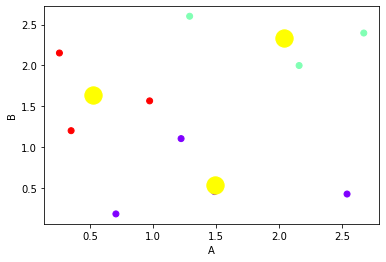

In [ ]:
plt.scatter(x[:,0], x[:,1], c=pred, cmap='rainbow')  
plt.xlabel('A')
plt.ylabel('B')
plt.scatter(centers[:, 0], centers[:, 1], s = 300, c = 'yellow')

In [ ]:
test = [[1.523,1.706]] #answer: for the given data point, for k=3, the class predicted by the model=1. This is verfied from the plot above.
model1.predict(test)

array([1], dtype=int32)

**Q5B - Agglomerative : 2 marks**

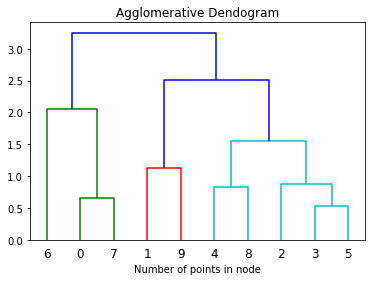

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
plt.title("Agglomerative Dendogram")
dend = shc.dendrogram(shc.linkage(x, method='ward'), p=3, truncate_mode="level" )  #k=2 is the optimal value of k from the dendrogram.
plt.xlabel("Number of points in node")
plt.show()

In [ ]:
model1 = AgglomerativeClustering(n_clusters=2)  #visually the point A = 1.523 and B =1.706 belongs to class 0
pred= model1.fit_predict(x)
print(pred)

[1 0 0 0 0 0 1 1 0 0]


Text(0, 0.5, 'B')

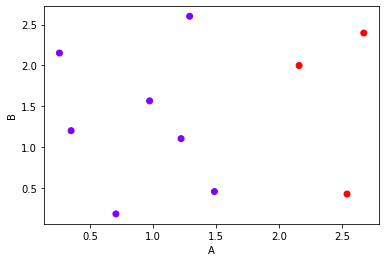

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=pred, cmap='rainbow')  #For this data set, k means clustering gives a better output than agglomerative clustering.
plt.xlabel('A')
plt.ylabel('B')

**Q6A - Logistic : 4 marks**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
from sklearn.preprocessing import LabelEncoder

In [ ]:
dataset = pd.read_csv('/content/airlines.csv')
lbl = LabelEncoder()  #converting categorical data from satisfaction and gender columns to numerical data
dataset['satisfaction_class'] = lbl.fit_transform(dataset['satisfaction'])
dataset['gender_class'] = lbl.fit_transform(dataset['Gender'])

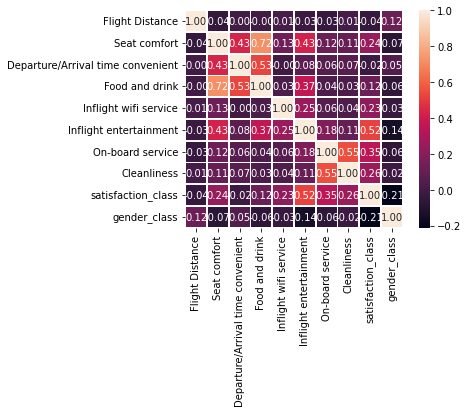

In [ ]:
sn.heatmap(dataset.corr(), annot = True, linewidths = 0.8, linecolor = 'w', square = True, fmt = '.2f')

In [ ]:
data = dataset[['Inflight entertainment', 'satisfaction_class']] #inflight entertainment is the most suitable input feature
data.columns = ['entertainment','satisfaction']
data

,entertainment,satisfaction
0,4,1
1,2,1
2,0,1
3,4,1
4,3,1
...,...,...
129875,5,1
129876,1,0
129877,2,0
129878,2,0


In [ ]:
x = np.array(data['entertainment']).reshape(-1,1) 
y = np.array(data['satisfaction']).reshape(-1,1)  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35)  

In [ ]:
regr = LogisticRegression()
regr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
print(regr.score(x_train, y_train)) 

0.8025514676269219


In [ ]:
y_pred = regr.predict(x_test)  #the test accuracy is less than train accuracy but only by a minimal amount which shows that neither overfitting nor underfitting has heppened
print(regr.score(x_test, y_test)) 
print(np.round_(regr.coef_, decimals = 2)) 
print(np.round_(regr.intercept_, decimals = 2))  #ln(p/1-p) = -3.21 + 1(x) is my logistic regression equation

0.8014430903251353
[[1.]]
[-3.21]


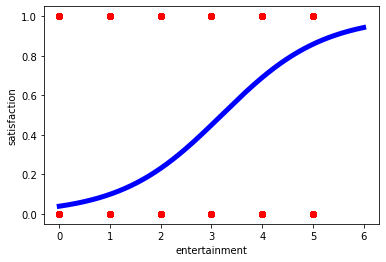

In [ ]:
X_test = np.linspace(0, 6, 10000)  #from the graph, for entertainment =0.79, satisfaction lies towards 0 which means "not satisfied"
Y = expit(X_test * regr.coef_ + regr.intercept_).flatten()  
plt.scatter(x_test, y_test, color ='red')
plt.plot(X_test, Y, color ='blue', linewidth= 5)
plt.xlabel('entertainment')
plt.ylabel('satisfaction')
plt.show()

**Q6B - Decision Tree : 3 marks**

In [ ]:
from sklearn import tree
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=2) #if we have a depth greater than 2, the tree will keep branching with the same output on the right hand side. Because if entertainment is <3.5, always satisfied.
clf = clf.fit(x_train, y_train) 

In [ ]:
clf.predict(x_test)

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
clf.score(x_train, y_train)

0.8082964156262585

In [ ]:
clf.score(x_test, y_test) #the test accuracy is slightly more than train accuracy which means our model is overfitting. K fold cross validation is one technique we can use to avoid this in the future.

0.8117603062167276

[Text(697.5, 906.0, 'entertainment <= 3.5\ngini = 0.495\nsamples = 84422\nvalue = [38192, 46230]\nclass = satisfied'),
 Text(348.75, 543.6, 'entertainment <= 0.5\ngini = 0.34\nsamples = 37828\nvalue = [29603, 8225]\nclass = not satisfied'),
 Text(174.375, 181.19999999999993, 'gini = 0.447\nsamples = 1938\nvalue = [654, 1284]\nclass = satisfied'),
 Text(523.125, 181.19999999999993, 'gini = 0.312\nsamples = 35890\nvalue = [28949, 6941]\nclass = not satisfied'),
 Text(1046.25, 543.6, 'entertainment <= 4.5\ngini = 0.301\nsamples = 46594\nvalue = [8589, 38005]\nclass = satisfied'),
 Text(871.875, 181.19999999999993, 'gini = 0.403\nsamples = 27260\nvalue = [7623, 19637]\nclass = satisfied'),
 Text(1220.625, 181.19999999999993, 'gini = 0.095\nsamples = 19334\nvalue = [966, 18368]\nclass = satisfied')]

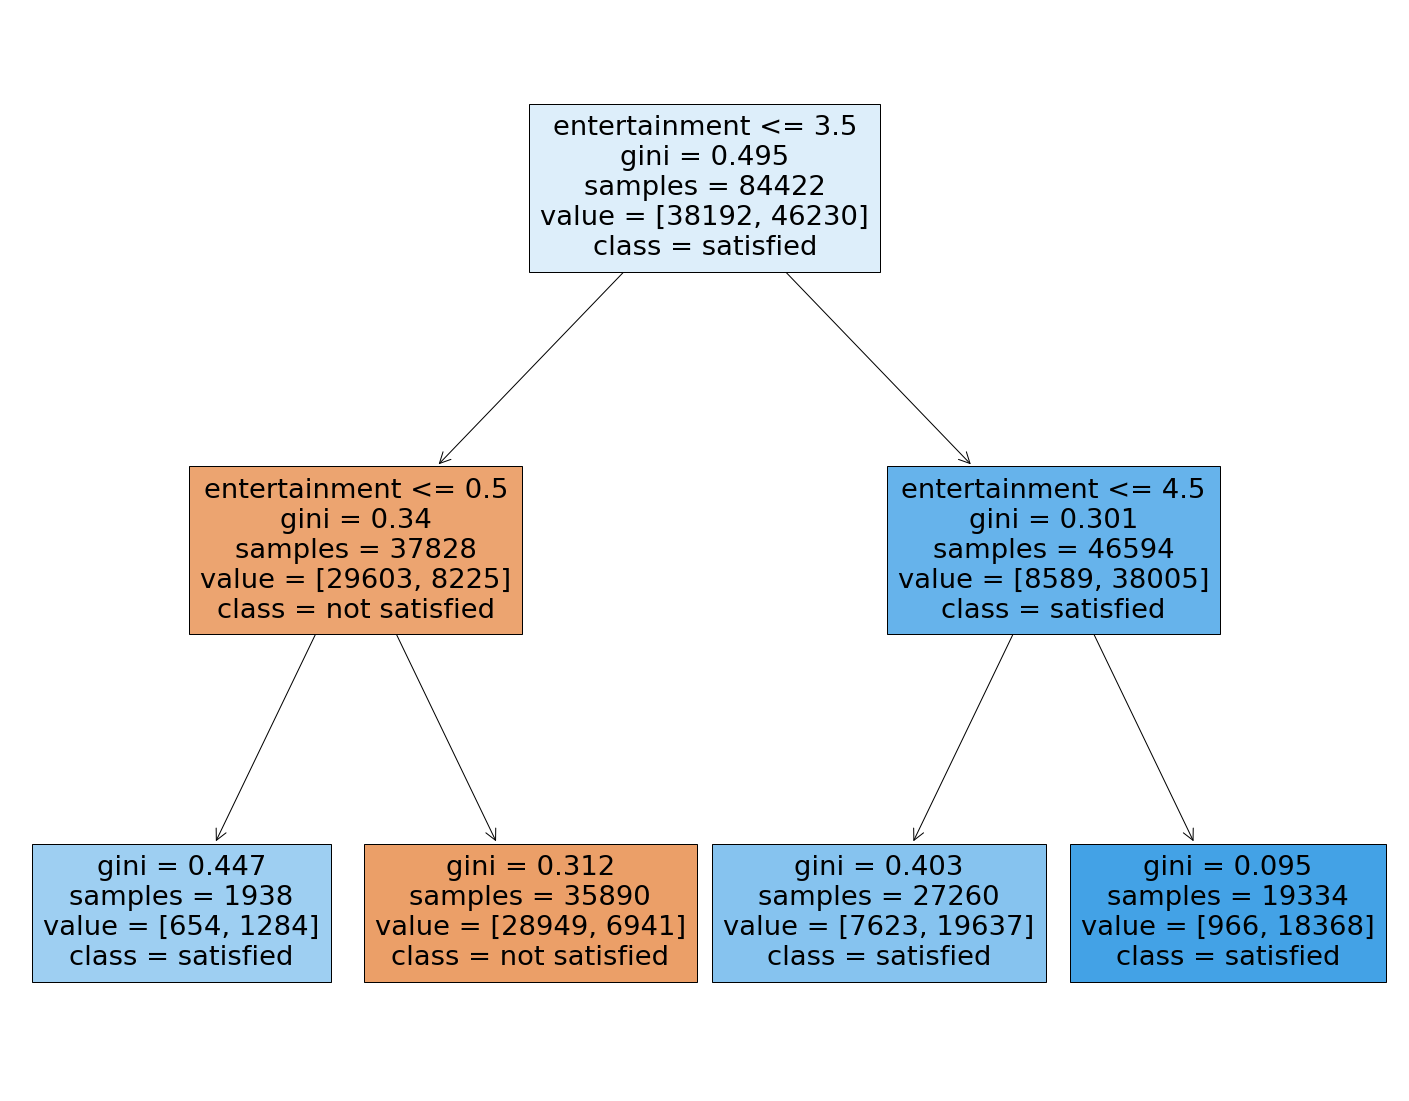

In [ ]:
feat = ['entertainment'] #from the decision tree, for entertainment =0.79, customer is "not satisfied". The answer is same as logistic regression, hence, our model accuracy is good.
labl = ['not satisfied', 'satisfied']
fig = plt.figure(figsize=(25,20)) 
tree.plot_tree(clf, feature_names= feat,  
                   class_names= labl,
                   filled=True)